# Example

In [1]:
import beatfinder
import torch
from IPython.display import Audio

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
totensor = beatfinder.model.ToTensor(device)
print(f'Device: {device}')

Device: cuda


Load a pretrained model.

In [2]:
model = beatfinder.model.load('./data/pretrained-models/model_12.pt', device)

Load an audio sample.

In [3]:
example = beatfinder.data.load(audio_file='./data/raw-datasets/BALLROOM/BallroomData/Samba/Media-103902.wav',
                                   offset=0, duration=10)

Use the model to predict which onsets are beats (by default this information is stored in `./tmp/`).

In [4]:
example.predict(model, device)

Look at the result.

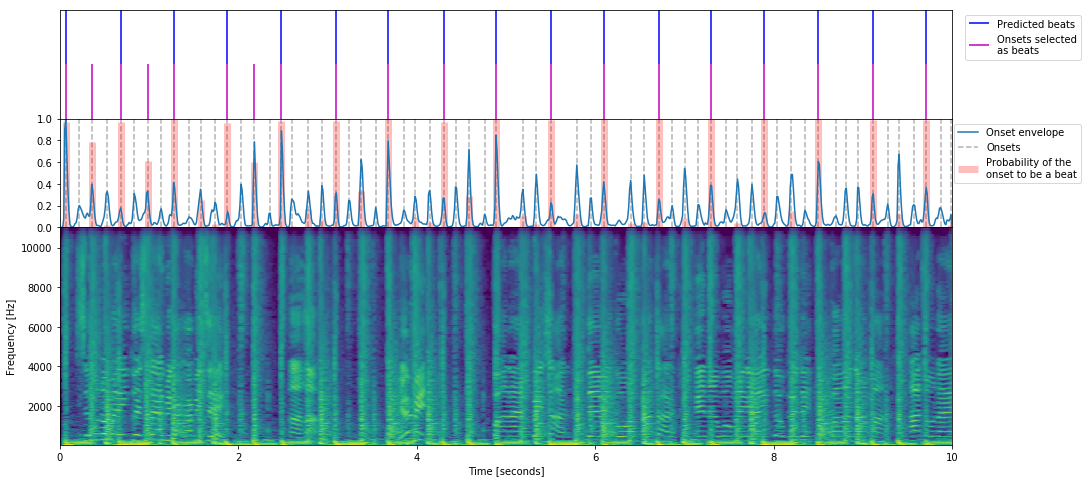

In [5]:
example.showdata(beatfinder=model, device=device)

Listen to the result.

In [6]:
beats_predicted = example.predicted_beats()[0]
clicks = beatfinder.display.clicks(example.get_wav(), beats_predicted)
Audio(clicks, rate=beatfinder.constants.sr)

## Compare with the ground truth beats

A `beats_files` is a text file containing the ground truth beats (in second) as float numbers (one per row). If this is available, we can plot it for comparison.

In [7]:
example = beatfinder.data.load(audio_file='./data/raw-datasets/BALLROOM/BallroomData/Samba/Media-106004.wav',
                                   beats_file='./data/raw-datasets/BALLROOM/beats/Media-106004.beats',
                                   offset=0, duration=10)

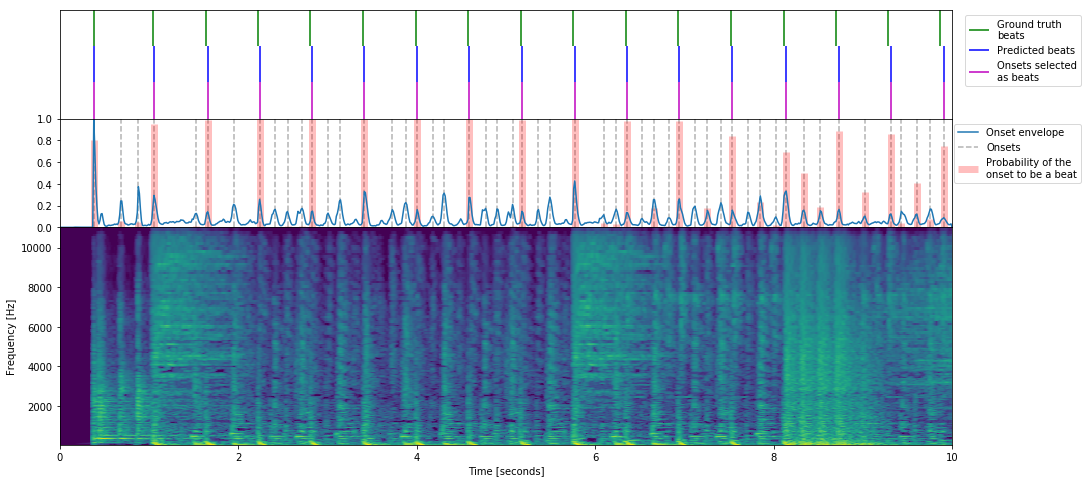

In [8]:
example.predict(model, device)
example.showdata(beatfinder=model, device=device)

The most common metric is the F-score, where two beats are considered the same if they are less than 0.07 seconds apart from each other.

In [9]:
predicted_beats, bpm = example.predicted_beats()
ground_truth_beats = example.get_beats()
tp, fn, fp = beatfinder.utils.tp_fn_fp(ground_truth_beats, predicted_beats)
F = beatfinder.utils.F(tp, fn, fp)
print(f"F-score: {F:.3f}")

F-score: 1.000


We can also listen to the ground truth beats:

In [10]:
clicks = beatfinder.display.clicks(example.get_wav(), example.get_beats())
Audio(clicks, rate=beatfinder.constants.sr)